In [1]:
import subprocess
print((subprocess.check_output("lscpu", shell=True).strip()).decode())

Architecture:          x86_64
CPU op-mode(s):        32-bit, 64-bit
Byte Order:            Little Endian
CPU(s):                8
On-line CPU(s) list:   0-7
Thread(s) per core:    1
Core(s) per socket:    8
Socket(s):             1
NUMA node(s):          1
Vendor ID:             GenuineIntel
CPU family:            6
Model:                 63
Model name:            Intel(R) Xeon(R) CPU E5-2673 v3 @ 2.40GHz
Stepping:              2
CPU MHz:               2394.458
BogoMIPS:              4788.91
Hypervisor vendor:     Microsoft
Virtualization type:   full
L1d cache:             32K
L1i cache:             32K
L2 cache:              256K
L3 cache:              30720K
NUMA node0 CPU(s):     0-7
Flags:                 fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology cpuid pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kstest
from sklearn.preprocessing import normalize
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split,GridSearchCV, ShuffleSplit, StratifiedShuffleSplit, LeaveOneOut
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [2]:
df=pd.read_table('australian.dat',sep='\s+',header=None)
df.columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','Y']

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
X1     690 non-null int64
X2     690 non-null float64
X3     690 non-null float64
X4     690 non-null int64
X5     690 non-null int64
X6     690 non-null int64
X7     690 non-null float64
X8     690 non-null int64
X9     690 non-null int64
X10    690 non-null int64
X11    690 non-null int64
X12    690 non-null int64
X13    690 non-null int64
X14    690 non-null int64
Y      690 non-null int64
dtypes: float64(3), int64(12)
memory usage: 80.9 KB


In [5]:
df_cat=df[['X1','X4','X5','X6','X8','X9','X11','X12','Y']]
df_cont=df[['X2','X3','X7','X10','X13','X14','Y']]

In [6]:
df_cont.describe()

,X2,X3,X7,X10,X13,X14,Y
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,31.568203,4.758725,2.223406,2.40000,184.014493,1018.385507,0.444928
std,11.853273,4.978163,3.346513,4.86294,172.159274,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,1.000000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,6.000000,0.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,396.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100001.000000,1.000000


# Exploration

### Class Ratio

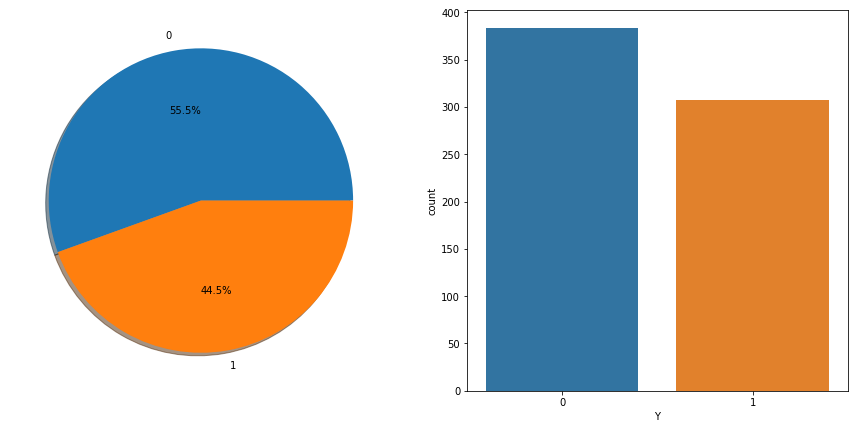

In [119]:
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Y'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot('Y',data=df,ax=ax[1])
plt.show()

### Correlation Matrix

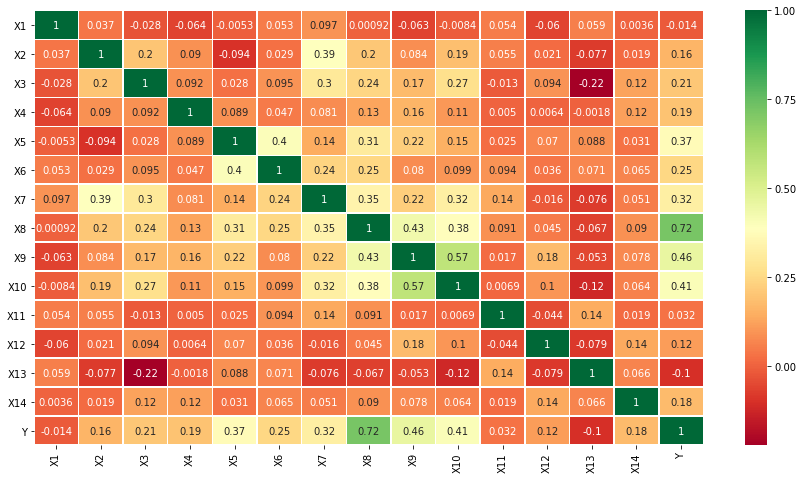

In [34]:
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

### Distribution Plot

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


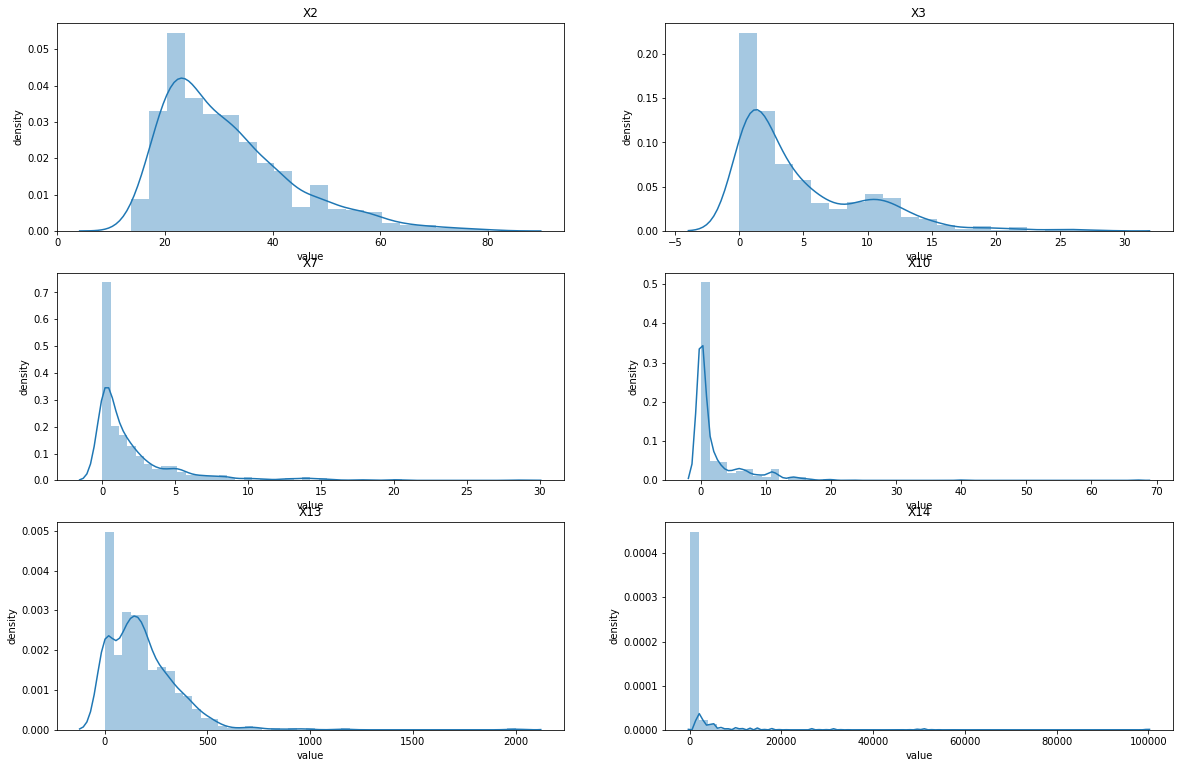

In [75]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,13))
feature_index = 0
for ii in range(3):
    for jj in range(2):
        ax = sns.distplot(df_cont.iloc[:, feature_index], ax=axes[ii,jj])
        ax.set(title=df_cont.columns.values[feature_index], xlabel="value",ylabel="density")      
        feature_index += 1
plt.show()

### Normality Test

In [122]:
KStestResults= []
for ii in range(len(df_cont.columns)):
    KStestResults.append(kstest(df.iloc[:,ii], 'norm'))
KStestResults

[KstestResult(statistic=0.51960561563376029, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=0.61725076974563464, pvalue=0.0),
 KstestResult(statistic=0.84134474606854293, pvalue=0.0),
 KstestResult(statistic=0.90043827384892228, pvalue=0.0),
 KstestResult(statistic=0.90734575414228291, pvalue=0.0),
 KstestResult(statistic=0.5, pvalue=0.0)]

### Boxplot

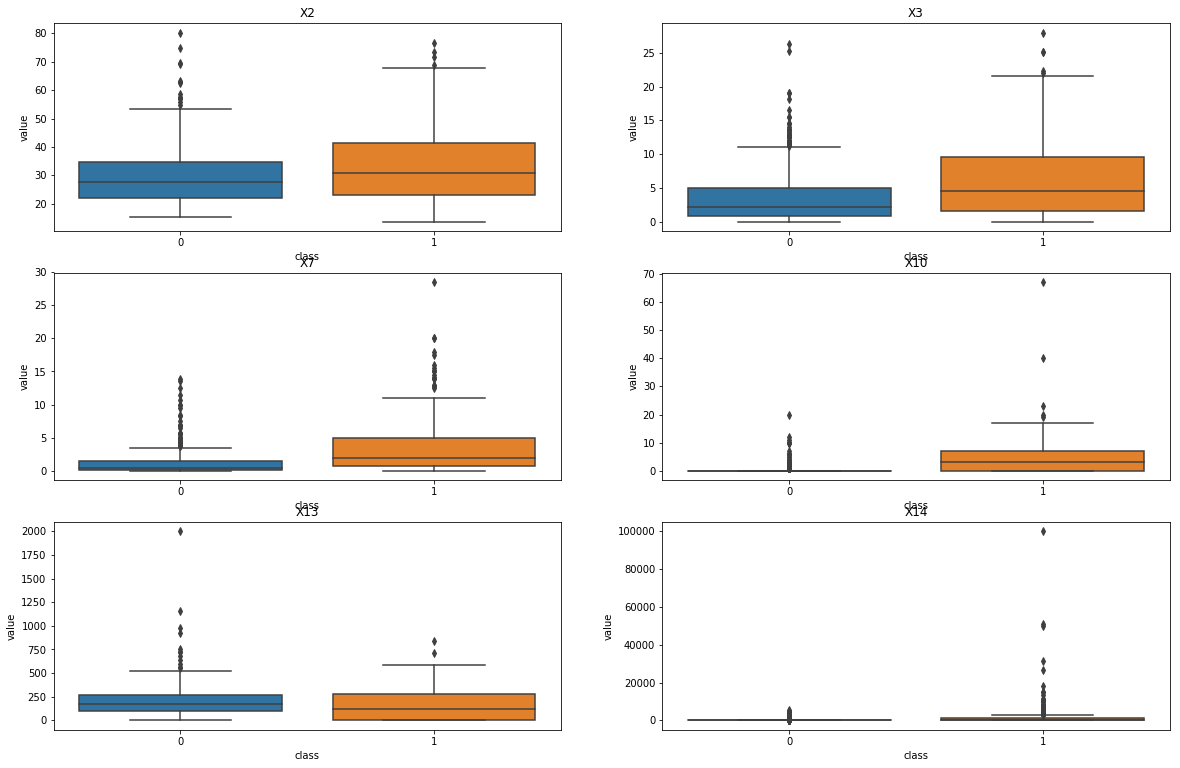

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,13))
feature_index = 0
for ii in range(3):
    for jj in range(2):
        ax = sns.boxplot(x=df_cont.Y, y=df_cont.columns.values[feature_index], data=df_cont, ax=axes[ii,jj])
        ax.set(title=df_cont.columns.values[feature_index], xlabel="class", ylabel="value")
        feature_index += 1
plt.show()

### Swarmplot

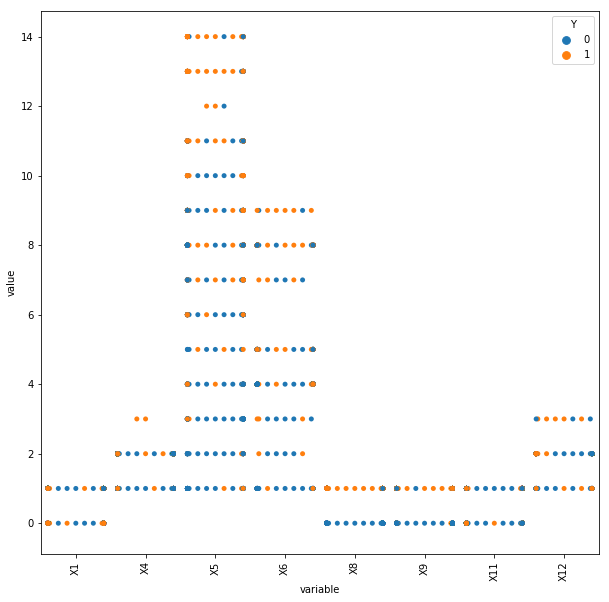

In [74]:
dff2=pd.melt(df_cat,id_vars='Y')
sns.swarmplot(x="variable", y="value", hue="Y", data=dff2)
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Preprocessing

In [7]:
x=df.drop('Y',axis=1)
x_cont=df_cont.drop('Y', axis=1)
x_cat=df_cat.drop('Y',axis=1)
y=df['Y']

### Feature Selection

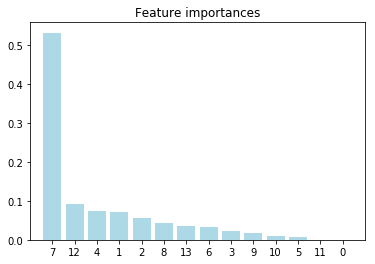

In [8]:
pohon=DecisionTreeClassifier(class_weight='balanced',random_state=2)
pohom = pohon.fit(x, y)
importances=pohon.feature_importances_

indices = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],color='lightblue')
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

In [9]:
pohon.feature_importances_
fs = SelectFromModel(pohon, threshold = 'median', prefit=True)
x_new = fs.transform(x)
x_new=pd.DataFrame(x_new)
x_new.head()

,0,1,2,3,4,5,6
0,22.08,11.46,4.0,0.0,0.0,100.0,1213.0
1,22.67,7.00,8.0,0.0,0.0,160.0,1.0
2,29.58,1.75,4.0,0.0,0.0,280.0,1.0
3,21.67,11.50,5.0,1.0,1.0,0.0,1.0
4,20.17,8.17,6.0,1.0,1.0,60.0,159.0


### Dummy For Categorical Features

In [11]:
x_dummy=pd.get_dummies(x_new[[2,3,4]],columns=x_new[[2,3,4]])
x_dummy.head()

,2_1.0,2_2.0,2_3.0,2_4.0,2_5.0,2_6.0,2_7.0,2_8.0,2_9.0,2_10.0,2_11.0,2_12.0,2_13.0,2_14.0,3_0.0,3_1.0,4_0.0,4_1.0
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


### Normalization

In [13]:
x_norm = pd.DataFrame(normalize(x_new[[0,1,5,6]]))
x_norm.head()

,0,1,2,3
0,0.018137,0.009414,0.082144,0.996411
1,0.140152,0.043276,0.989164,0.006182
2,0.105056,0.006215,0.994441,0.003552
3,0.882589,0.468379,0.000000,0.040729
4,0.117725,0.047685,0.350198,0.928024


### PCA

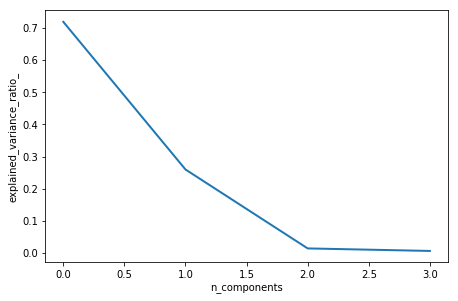

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_norm)

plt.figure(1, figsize=(8, 5))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()

In [16]:
pca = PCA(n_components=2)
x_pca=pca.fit_transform(x_norm)

In [17]:
x_pca=pd.DataFrame(x_pca)
x_pca = pd.concat([x_pca, x_dummy],axis=1)
x_pca.head()

,0,1,2_1.0,2_2.0,2_3.0,2_4.0,2_5.0,2_6.0,2_7.0,2_8.0,2_9.0,2_10.0,2_11.0,2_12.0,2_13.0,2_14.0,3_0.0,3_1.0,4_0.0,4_1.0
0,0.819294,-0.158148,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,-0.527039,-0.080555,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,-0.531070,-0.113969,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.153018,1.001204,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0.579835,-0.175551,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


# Model

### Repeated Holdout

In [23]:
ss = ShuffleSplit(n_splits=10, test_size=0.33,random_state=10)
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('MLP', MLPClassifier (max_iter=1000)))

results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, x_pca, y, cv=ss)
    results.append(akurasi.mean())
    names.append(name)
tabel=pd.DataFrame({'Akurasi':results},index=names).sort_values('Akurasi',ascending=False)
tabel

,Akurasi
Logistic Regression,0.871053
SVM,0.860965
KNN,0.860526
MLP,0.858772
Gradient Boosting,0.854386
Random Forest,0.841228
CART,0.814912
Naive Bayes,0.812281


### Stratified Repeated Holdout

In [24]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.33,random_state=11)
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('MLP', MLPClassifier (max_iter=1000)))

results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, x_pca, y, cv=sss)
    results.append(akurasi.mean())
    names.append(name)
tabel=pd.DataFrame({'Akurasi':results},index=names).sort_values('Akurasi',ascending=False)
tabel

,Akurasi
Logistic Regression,0.857018
KNN,0.849123
MLP,0.847368
Gradient Boosting,0.845175
SVM,0.844737
Random Forest,0.842982
CART,0.807456
Naive Bayes,0.775439


### Randomized Kfold

In [16]:
kfold=KFold(n_splits=10,random_state=12)
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('MLP', MLPClassifier (max_iter=1000)))

results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, x_pca, y, cv=kfold)
    results.append(akurasi.mean())
    names.append(name)
tabel=pd.DataFrame({'Akurasi':results},index=names).sort_values('Akurasi',ascending=False)
tabel

,Akurasi
KNN,0.863768
Logistic Regression,0.863768
SVM,0.855072
Gradient Boosting,0.852174
MLP,0.850725
Random Forest,0.836232
CART,0.821739
Naive Bayes,0.818841


### Stratified Kfold

In [ ]:
skfold=StratifiedKFold(n_splits=10,random_state=13)
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('MLP', MLPClassifier (max_iter=1000)))

results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, x_pca, y, cv=skfold)
    results.append(akurasi.mean())
    names.append(name)
tabel=pd.DataFrame({'Akurasi':results},index=names).sort_values('Akurasi',ascending=False)
tabel

,Akurasi
Logistic Regression,0.865222
KNN,0.865033
MLP,0.857891
SVM,0.855096
Gradient Boosting,0.851924
Random Forest,0.834677
Naive Bayes,0.819973
CART,0.814468


### Leave One Out

In [23]:
lvo=LeaveOneOut()
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('MLP', MLPClassifier ()))

results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, x_pca, y, cv=lvo)
    results.append(akurasi.mean())
    names.append(name)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/nb

In [24]:
tabel=pd.DataFrame({'Akurasi':results},index=names).sort_values('Akurasi',ascending=False)
tabel

,Akurasi
KNN,0.873913
Logistic Regression,0.869565
MLP,0.863768
Gradient Boosting,0.856522
SVM,0.855072
Random Forest,0.846377
Naive Bayes,0.836232
CART,0.810145


# Parameter Tuning

### Decision Tree

In [17]:
parameter={
    'max_depth': [None, 2, 3, 4, 5, 6, 7],
    'min_samples_split' : np.arange(2,202,20),
    'min_samples_leaf' : np.arange(1,201,20),
    'max_leaf_nodes': (None, 2, 5, 10, 20, 50),
    'class_weight': ['balanced', None]
}
grid=GridSearchCV(DecisionTreeClassifier(), parameter, verbose=1, n_jobs=-1)
gridfit=grid.fit(x_pca,y)
gridfit.best_params_

Fitting 3 folds for each of 8400 candidates, totalling 25200 fits


[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 5376 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 13876 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 25200 out of 25200 | elapsed:   20.0s finished


{'class_weight': 'balanced',
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 21,
 'min_samples_split': 2}

### SVM

In [26]:
parameter = [
  {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear']},
  {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [ 0.01, 1], 'kernel': ['rbf','poly']},
 ]
grid=GridSearchCV(SVC(cache_size=1000), parameter, verbose=1, n_jobs=-1)
gridfit=grid.fit(x_pca,y)
gridfit.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished


{'C': 0.01, 'kernel': 'linear'}

### Logistic Regression

In [18]:
parameter={
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.3, 0.5, 0.8,1],
    'class_weight':['balanced', None]
    }
grid=GridSearchCV(LogisticRegression(), parameter,n_jobs=-1, verbose=1)
gridfit=grid.fit(x_pca,y)
gridfit.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished


{'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l2'}

### Random Forest

In [19]:
parameter={
    'max_depth': [2,3,5,7,10,None],
    'min_samples_leaf': [1,10,30,60],
    'max_features': [1.0,'log2','sqrt','auto',None],
    'n_estimators': [1,2,3,5,10]
    }
grid=GridSearchCV(RandomForestClassifier(), parameter,n_jobs=-1, verbose=1)
gridfit=grid.fit(x_pca,y)
gridfit.best_params_

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:    4.4s finished


{'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'n_estimators': 10}

### Gradient Boosting

In [22]:
parameter={
    'learning_rate': [0.01, 0.03, 0.05, 0.1,1],
    'max_depth': [2,3,5,7,10,100],
    'min_samples_leaf': [1,10,30,60,100,200],
    'max_features': ['log2','sqrt','auto',None],
    'n_estimators': [1,2,3,10,50,100]
    }
grid=GridSearchCV(GradientBoostingClassifier(), parameter,n_jobs=-1, verbose=1)
gridfit=grid.fit(x_pca,y)
gridfit.best_params_

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2229 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 3485 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 5235 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 7485 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 10235 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 12960 out of 12960 | elapsed:  1.4min finished


{'learning_rate': 0.05,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 30,
 'n_estimators': 50}

### KNN

In [21]:
parameter={
    'n_neighbors': [5,10,20,50,100], 
    'weights': ['uniform','distance']
    }
grid=GridSearchCV(KNeighborsClassifier(), parameter,n_jobs=-1,verbose=1)
gridfit=grid.fit(x_pca,y)
gridfit.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished


{'n_neighbors': 20, 'weights': 'uniform'}

### MLP

In [22]:
parameter={
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1]
    }
grid=GridSearchCV(MLPClassifier(max_iter=1000), parameter,n_jobs=-1, verbose=1)
gridfit=grid.fit(x_pca,y)
gridfit.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  5.4min finished


{'activation': 'tanh',
 'alpha': 0.1,
 'learning_rate': 'constant',
 'learning_rate_init': 0.1}

# Model Best Parameter

### Randomize Repeated Holdout

In [27]:
ss = ShuffleSplit(n_splits=10, test_size=0.33, random_state=10)
models = []
models.append(('CART', DecisionTreeClassifier(class_weight='balanced', max_depth=None, max_leaf_nodes=None, min_samples_leaf=21, min_samples_split=2)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=20, weights='uniform')))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC(C=0.01,kernel='linear')))
models.append(('Random Forest', RandomForestClassifier(max_depth= 2, n_estimators= 10, min_samples_leaf= 10, max_features= 'auto')))
models.append(('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.05, max_depth= 2, n_estimators= 50, min_samples_leaf= 30, max_features= 'auto')))
models.append(('Logistic Regression', LogisticRegression(penalty= 'l2', class_weight= 'balanced', C= 0.5)))
models.append(('MLP', MLPClassifier (max_iter=1000,learning_rate= 'constant', activation= 'tanh', learning_rate_init= 0.1, alpha= 0.1)))
results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, x_pca, y, cv=ss)
    results.append(akurasi.mean())
    names.append(name)
tabel=pd.DataFrame({'Akurasi':results},index=names).sort_values('Akurasi',ascending=False)
tabel

,Akurasi
Gradient Boosting,0.870614
Logistic Regression,0.870175
Random Forest,0.867544
CART,0.865789
KNN,0.865789
SVM,0.860965
MLP,0.856579
Naive Bayes,0.812281


### Stratified Repeated Holdout

In [28]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.33, random_state=11)
models = []
models.append(('CART', DecisionTreeClassifier(class_weight='balanced', max_depth=None, max_leaf_nodes=None, min_samples_leaf=21, min_samples_split=2)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=20, weights='uniform')))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC(C=0.01,kernel='linear')))
models.append(('Random Forest', RandomForestClassifier(max_depth= 2, n_estimators= 10, min_samples_leaf= 10, max_features= 'auto')))
models.append(('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.05, max_depth= 2, n_estimators= 50, min_samples_leaf= 30, max_features= 'auto')))
models.append(('Logistic Regression', LogisticRegression(penalty= 'l2', class_weight= 'balanced', C= 0.5)))
models.append(('MLP', MLPClassifier (max_iter=1000,learning_rate= 'constant', activation= 'tanh', learning_rate_init= 0.1, alpha= 0.1)))
results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, x_pca, y, cv=ss)
    results.append(akurasi.mean())
    names.append(name)
tabel=pd.DataFrame({'Akurasi':results},index=names).sort_values('Akurasi',ascending=False)
tabel

,Akurasi
Gradient Boosting,0.870614
Logistic Regression,0.870175
CART,0.865789
KNN,0.865789
SVM,0.860965
MLP,0.857456
Random Forest,0.839474
Naive Bayes,0.812281


### Randomized Kfold

In [29]:
kfold=KFold(n_splits=10,random_state=12)
models = []
models.append(('CART', DecisionTreeClassifier(class_weight='balanced', max_depth=None, max_leaf_nodes=None, min_samples_leaf=21, min_samples_split=2)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=20, weights='uniform')))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC(C=0.01,kernel='linear')))
models.append(('Random Forest', RandomForestClassifier(max_depth= 2, n_estimators= 10, min_samples_leaf= 10, max_features= 'auto')))
models.append(('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.05, max_depth= 2, n_estimators= 50, min_samples_leaf= 30, max_features= 'auto')))
models.append(('Logistic Regression', LogisticRegression(penalty= 'l2', class_weight= 'balanced', C= 0.5)))
models.append(('MLP', MLPClassifier (max_iter=1000,learning_rate= 'constant', activation= 'tanh', learning_rate_init= 0.1, alpha= 0.1)))
results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, x_pca, y, cv=ss)
    results.append(akurasi.mean())
    names.append(name)
tabel=pd.DataFrame({'Akurasi':results},index=names).sort_values('Akurasi',ascending=False)
tabel

,Akurasi
Gradient Boosting,0.870614
Logistic Regression,0.870175
CART,0.865789
KNN,0.865789
SVM,0.860965
MLP,0.860526
Random Forest,0.859211
Naive Bayes,0.812281


### Stratified Kfold

In [30]:
skfold=StratifiedKFold(n_splits=10,random_state=13)
models = []
models.append(('CART', DecisionTreeClassifier(class_weight='balanced', max_depth=None, max_leaf_nodes=None, min_samples_leaf=21, min_samples_split=2)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=20, weights='uniform')))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC(C=0.01,kernel='linear')))
models.append(('Random Forest', RandomForestClassifier(max_depth= 2, n_estimators= 10, min_samples_leaf= 10, max_features= 'auto')))
models.append(('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.05, max_depth= 2, n_estimators= 50, min_samples_leaf= 30, max_features= 'auto')))
models.append(('Logistic Regression', LogisticRegression(penalty= 'l2', class_weight= 'balanced', C= 0.5)))
models.append(('MLP', MLPClassifier (max_iter=1000,learning_rate= 'constant', activation= 'tanh', learning_rate_init= 0.1, alpha= 0.1)))
results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, x_pca, y, cv=ss)
    results.append(akurasi.mean())
    names.append(name)
tabel=pd.DataFrame({'Akurasi':results},index=names).sort_values('Akurasi',ascending=False)
tabel

,Akurasi
Gradient Boosting,0.870614
Logistic Regression,0.870175
Random Forest,0.868860
CART,0.865789
KNN,0.865789
SVM,0.860965
MLP,0.853947
Naive Bayes,0.812281


### Leave One Out

In [33]:
lvo=LeaveOneOut()
models = []
models.append(('CART', DecisionTreeClassifier(class_weight='balanced', max_depth=None, max_leaf_nodes=None, min_samples_leaf=21, min_samples_split=2)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=20, weights='uniform')))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC(C=0.01,kernel='linear')))
models.append(('Random Forest', RandomForestClassifier(max_depth= 2, n_estimators= 10, min_samples_leaf= 10, max_features= 'auto')))
models.append(('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.05, max_depth= 2, n_estimators= 50, min_samples_leaf= 30, max_features= 'auto')))
models.append(('Logistic Regression', LogisticRegression(penalty= 'l2', class_weight= 'balanced', C= 0.5)))
models.append(('MLP', MLPClassifier (max_iter=1000,learning_rate= 'constant', activation= 'tanh', learning_rate_init= 0.1, alpha= 0.1)))
results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, x_pca, y, cv=lvo)
    results.append(akurasi.mean())
    names.append(name)

In [34]:
tabel=pd.DataFrame({'Akurasi':results},index=names).sort_values('Akurasi',ascending=False)
tabel

,Akurasi
CART,0.879710
Gradient Boosting,0.878261
KNN,0.866667
Logistic Regression,0.863768
MLP,0.856522
SVM,0.855072
Random Forest,0.853623
Naive Bayes,0.836232
